In [1]:
import sys 
sys.path.append('/Users/nicolaslynn/Documents/phd/libraries/genebeddings/genebeddings/wrappers')
sys.path.append('/Users/nicolaslynn/Documents/phd/libraries/genebeddings/genebeddings')
from nt_wrapper import NTWrapper
from borzoi_wrapper import BorzoiWrapper

from genebeddings import *


INFO:genebeddings:Saved figure to KRAS_mutations.png


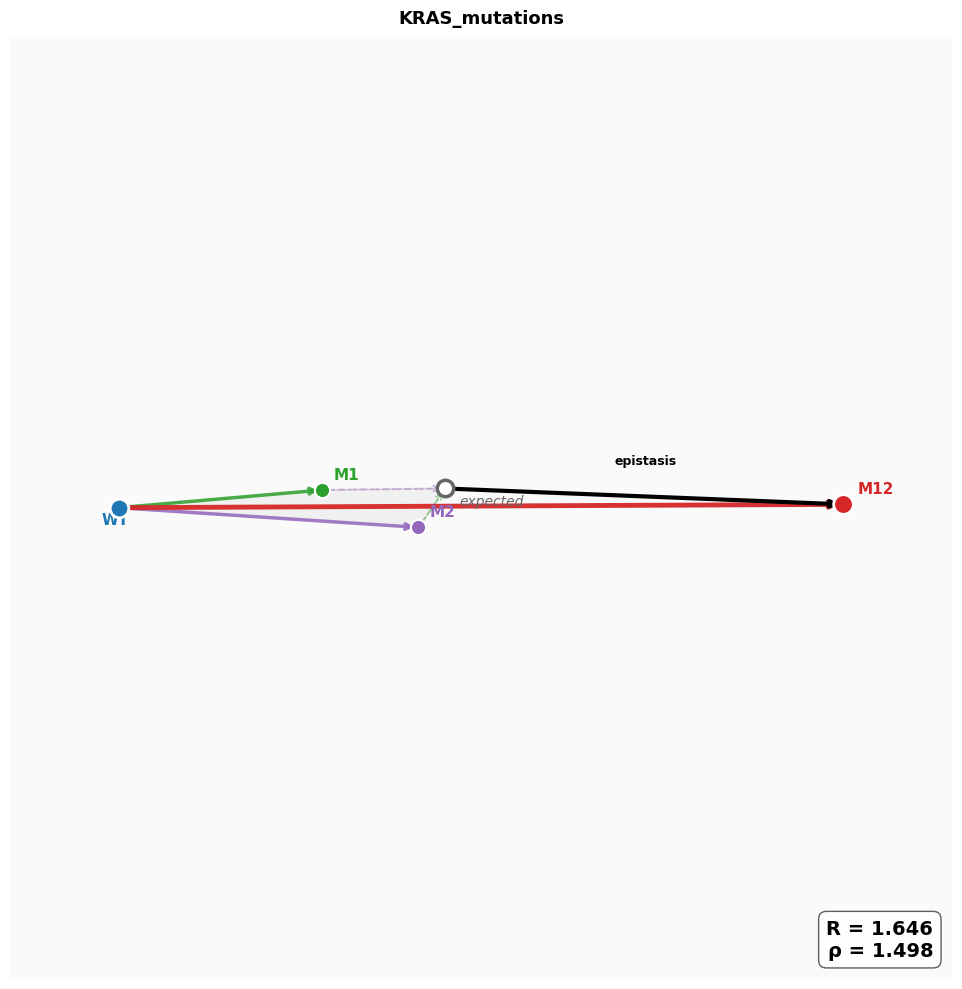

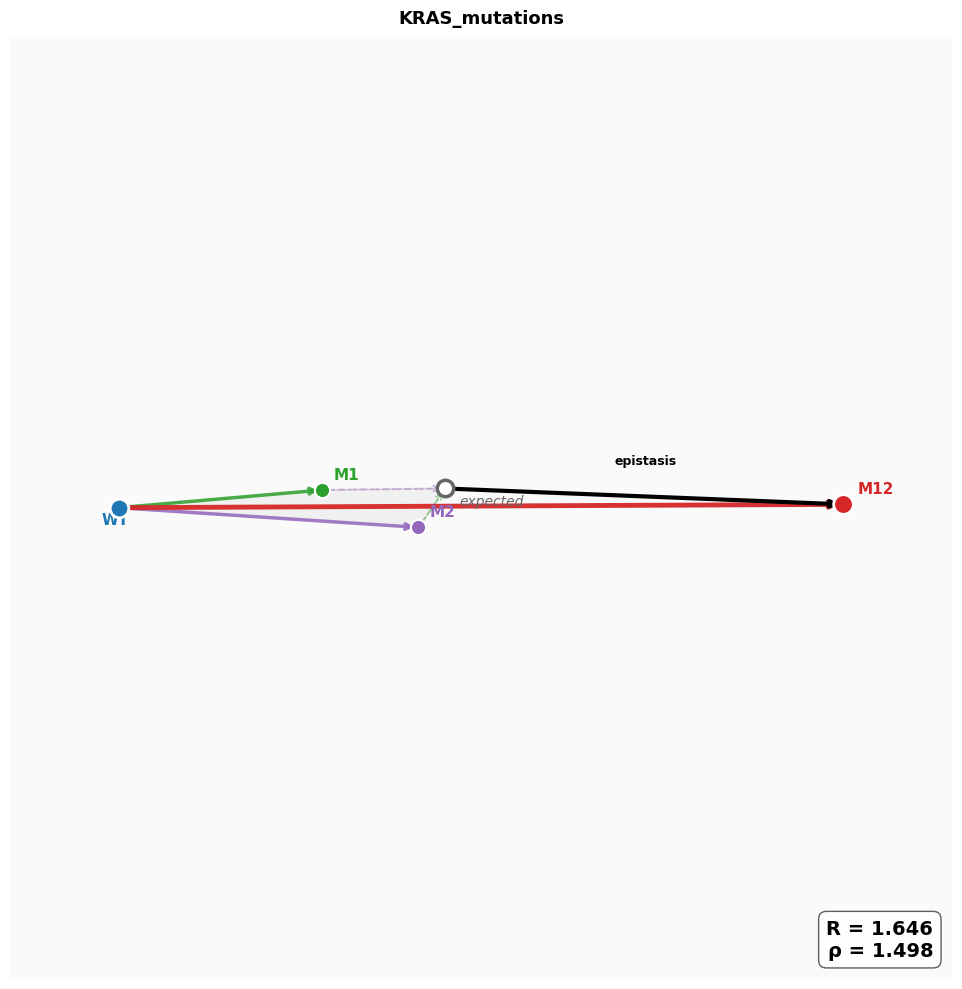

In [27]:
from genebeddings import *
model, context = NTWrapper(), 3_000
# model, context = BorzoiWrapper(repo='johahi/borzoi-replicate-0'), 250_000
epistasis_id = 'KRAS:12:25227343:G:T:N|KRAS:12:25227344:A:T:N'
epistasis_id = 'BRAF:7:140753336:A:T:N|BRAF:7:140753337:C:T:N'
epistasis_id = 'CEP89:19:32948252:T:-:N|CEP89:19:32948253:T:C:N'
epistasis_id = 'SWI5:9:128276134:G:A:P|SWI5:9:128276135:G:A:P'
epistasis_id = 'NDUFB9:8:124539103:C:T:P|NDUFB9:8:124539104:C:T:P'
epistasis_id = 'KRAS:12:25227343:G:T:N|KRAS:12:25227344:A:T:N'
epistasis_id = 'HNRNPUL2:11:62721446:A:-:N|HNRNPUL2:11:62721447:A:G:N'
epistasis_id = 'NRAS:1:114713908:T:C:N|NRAS:1:114713909:G:T:N'
epistasis_id = 'BRAF:7:140753335:C:T:N|BRAF:7:140753336:A:T:N'
epistasis_id = 'NGRN:15:90271387:A:C:P|NGRN:15:90271388:C:T:P'
epistasis_id = 'NUP98:11:3719358:G:-:N|NUP98:11:3719359:A:T:N'
epistasis_id = 'HEPH:X:66258815:C:T:P|HEPH:X:66258820:C:T:P'
epistasis_id = 'IL1RAP:3:190627308:G:T:P|IL1RAP:3:190627310:T:G:P'
epistasis_id = 'TP53:17:7674894:G:A:N|TP53:17:7674945:G:A:N'
model_name = 'Nucleotide Transformer - 500M - MultiSpecies'
# g = EpistasisGeometry(*embed_epistasis(model, epistasis_id, context=3000))
# m = g.metrics()
# g.plot(figure_name=f'{model_name}_{epistasis_id}')

epi = EpistasisGeometry(*embed_epistasis(model, epistasis_id, context=context))
epi.plot_story(figure_name="KRAS_mutations")




In [35]:
from itertools import combinations, product
from seqmat import SeqMat

BASES = "ACGT"

# Load region
seqmat = SeqMat.from_fasta('hg38', 'chr12', 25227343-15, 25227344+15)
seq, indices = seqmat.seq, seqmat.index   # seq: string, indices: array of genomic positions


def get_all_epistasis_ids(seq, indices, gene, chrom, zyg="N"):
    """
    Generate all epistasis IDs for all unordered pairs of positions
    covered by (seq, indices), with all non-reference ALT combos.
    """
    L = len(seq)
    all_ids = []

    for i, j in combinations(range(L), 2):  # i < j, all position pairs
        pos1, pos2 = int(indices[i]), int(indices[j])
        ref1, ref2 = seq[i], seq[j]

        # skip weird bases if desired
        if ref1 not in BASES or ref2 not in BASES:
            continue

        alts1 = [b for b in BASES if b != ref1]
        alts2 = [b for b in BASES if b != ref2]

        for alt1, alt2 in product(alts1, alts2):  # 3×3 combos
            id1 = f"{gene}:{chrom}:{pos1}:{ref1}:{alt1}:{zyg}"
            id2 = f"{gene}:{chrom}:{pos2}:{ref2}:{alt2}:{zyg}"
            all_ids.append(f"{id1}|{id2}")

    return all_ids


all_possible_epistasis_ids = get_all_epistasis_ids(
    seq=seq,
    indices=indices,
    gene="KRAS",
    chrom="12",
    zyg="P",
)

# Example: peek at a few
for eid in all_possible_epistasis_ids[:10]:
    print(eid)

for eid in all_possible_epistasis_ids[-10:]:
    print(eid)

print(len(all_possible_epistasis_ids))    
    
# g = EpistasisGeometry(*embed_epistasis(model, epistasis_id, context=3000))
# c = g.complex_coords()






KRAS:12:25227328:C:A:P|KRAS:12:25227329:A:C:P
KRAS:12:25227328:C:A:P|KRAS:12:25227329:A:G:P
KRAS:12:25227328:C:A:P|KRAS:12:25227329:A:T:P
KRAS:12:25227328:C:G:P|KRAS:12:25227329:A:C:P
KRAS:12:25227328:C:G:P|KRAS:12:25227329:A:G:P
KRAS:12:25227328:C:G:P|KRAS:12:25227329:A:T:P
KRAS:12:25227328:C:T:P|KRAS:12:25227329:A:C:P
KRAS:12:25227328:C:T:P|KRAS:12:25227329:A:G:P
KRAS:12:25227328:C:T:P|KRAS:12:25227329:A:T:P
KRAS:12:25227328:C:A:P|KRAS:12:25227330:C:A:P
KRAS:12:25227357:A:T:P|KRAS:12:25227359:A:T:P
KRAS:12:25227358:G:A:P|KRAS:12:25227359:A:C:P
KRAS:12:25227358:G:A:P|KRAS:12:25227359:A:G:P
KRAS:12:25227358:G:A:P|KRAS:12:25227359:A:T:P
KRAS:12:25227358:G:C:P|KRAS:12:25227359:A:C:P
KRAS:12:25227358:G:C:P|KRAS:12:25227359:A:G:P
KRAS:12:25227358:G:C:P|KRAS:12:25227359:A:T:P
KRAS:12:25227358:G:T:P|KRAS:12:25227359:A:C:P
KRAS:12:25227358:G:T:P|KRAS:12:25227359:A:G:P
KRAS:12:25227358:G:T:P|KRAS:12:25227359:A:T:P
4464


In [36]:
import pandas as pd
from tqdm import tqdm

def collect_epistasis_distribution(
    model,
    epistasis_ids,
    context: int = 3000,
) -> pd.DataFrame:
    """
    For each epistasis_id:
      - build EpistasisGeometry
      - extract complex coords (rho, theta, theta_over_pi)
      - extract metrics() fields:
          epi_R_raw, epi_R_singles, epi_R_expected

    Returns a DataFrame with one row per epistasis_id.
    """
    records = []

    for epi_id in tqdm(epistasis_ids, desc="Epistasis sweep"):
        try:
            # Build geometry object from embeddings
            g = EpistasisGeometry(*embed_epistasis(model, epi_id, context=context))

            # Complex coordinates
            c = g.complex_coords()
            rho = c.rho
            theta = c.theta
            theta_over_pi = c.theta_over_pi

            # Metrics dictionary
            m = g.metrics()
            epi_R_raw = m.epi_R_raw
            epi_R_singles = m.epi_R_singles
            epi_R_expected = m.epi_R_expected

            records.append(
                {
                    "epistasis_id": epi_id,
                    # radial / angular epistasis
                    "rho": rho,                         # |ε|
                    "theta": theta,                     # radians
                    "theta_over_pi": theta_over_pi,     # normalized angle
                    # metrics()
                    "epi_R_raw": epi_R_raw,
                    "epi_R_singles": epi_R_singles,
                    "epi_R_expected": epi_R_expected,
                }
            )

        except Exception as e:
            # Optional: log and skip failures
            print(f"Skipping {epi_id} due to error: {e}")
            continue

    return pd.DataFrame(records)


# Usage:
df_epi = collect_epistasis_distribution(
    model,
    all_possible_epistasis_ids,
    context=3000,
)

# e.g. quick look / sanity check
print(df_epi.head())
print(df_epi.describe())



Epistasis sweep: 100%|██████████| 4464/4464 [1:55:03<00:00,  1.55s/it]

                                    epistasis_id       rho     theta  \
0  KRAS:12:25227328:C:A:P|KRAS:12:25227329:A:C:P  0.652266  0.154777   
1  KRAS:12:25227328:C:A:P|KRAS:12:25227329:A:G:P  0.674978  0.392577   
2  KRAS:12:25227328:C:A:P|KRAS:12:25227329:A:T:P  0.647558  0.182792   
3  KRAS:12:25227328:C:G:P|KRAS:12:25227329:A:C:P  0.678199 -0.022314   
4  KRAS:12:25227328:C:G:P|KRAS:12:25227329:A:G:P  0.584489  0.446626   

   theta_over_pi  epi_R_raw  epi_R_singles  epi_R_expected  
0       0.049267   0.000005       0.000215        0.526627  
1       0.124961   0.000003       0.000111        0.312500  
2       0.058185   0.000003       0.000101        0.246154  
3      -0.007103   0.000002       0.000084        0.265487  
4       0.142166   0.000004       0.000167        0.446667  
               rho        theta  theta_over_pi     epi_R_raw  epi_R_singles  \
count  4464.000000  4464.000000    4464.000000  4.464000e+03    4464.000000   
mean      0.904307    -0.018859      -0.006

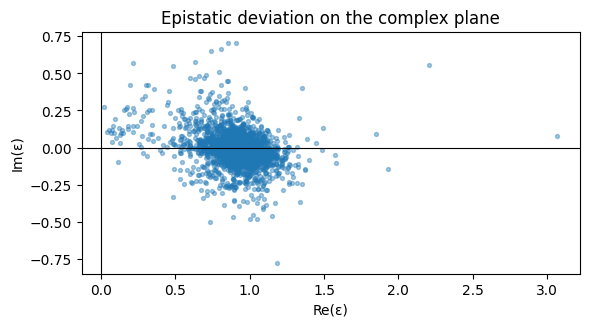

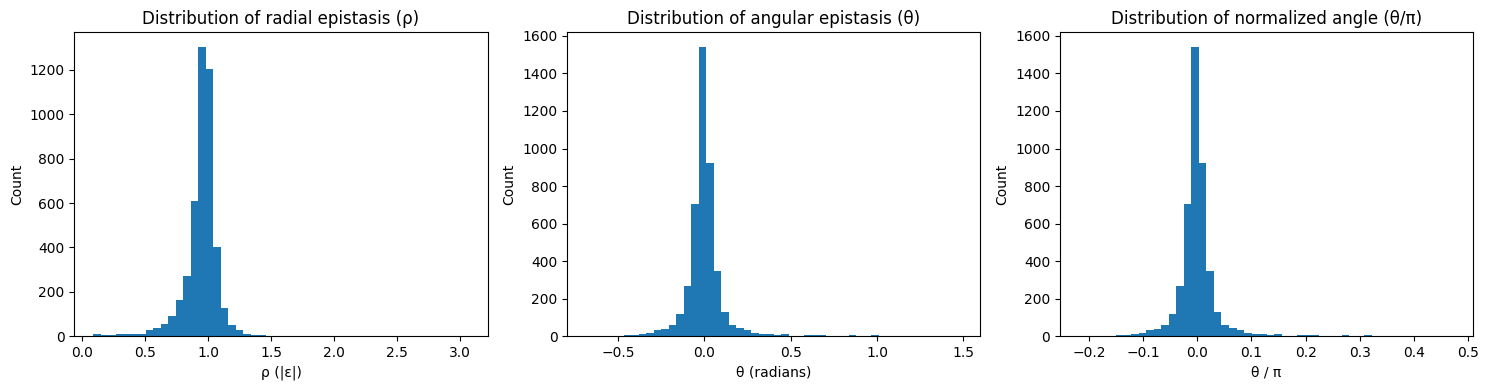

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 1. Complex plane scatter: rho + theta -> x + iy
# ------------------------------------------------------------------
rho = df_epi["rho"].values
theta = df_epi["theta"].values

x = rho * np.cos(theta)
y = rho * np.sin(theta)

fig, ax = plt.subplots(figsize=(6, 6))
sc = ax.scatter(x, y, s=8, alpha=0.4)

ax.axhline(0, color="black", linewidth=0.8)
ax.axvline(0, color="black", linewidth=0.8)
ax.set_xlabel("Re(ε)")
ax.set_ylabel("Im(ε)")
ax.set_title("Epistatic deviation on the complex plane")

ax.set_aspect("equal", adjustable="box")
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------
# 2. Marginal distributions for rho, theta, theta_over_pi
# ------------------------------------------------------------------
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# |ε| (radial epistasis)
axs[0].hist(df_epi["rho"], bins=50)
axs[0].set_xlabel("ρ (|ε|)")
axs[0].set_ylabel("Count")
axs[0].set_title("Distribution of radial epistasis (ρ)")

# θ (absolute angle, radians)
axs[1].hist(df_epi["theta"], bins=50)
axs[1].set_xlabel("θ (radians)")
axs[1].set_ylabel("Count")
axs[1].set_title("Distribution of angular epistasis (θ)")

# θ/π (normalized angle)
axs[2].hist(df_epi["theta_over_pi"], bins=50)
axs[2].set_xlabel("θ / π")
axs[2].set_ylabel("Count")
axs[2].set_title("Distribution of normalized angle (θ/π)")

plt.tight_layout()
plt.show()

In [37]:
df_epi.to_csv('/Users/nicolaslynn/Documents/phd/projects/genomenet/kras_area_distribution_posstrand.csv')

In [42]:
tcga_doubles = ['BPIFC:22:32417207:G:T:N|BPIFC:22:32417208:C:T:N', 'CDH4:20:61920006:C:T:P|CDH4:20:61920007:A:G:P', 'TBK1:12:64497638:G:T:P|TBK1:12:64497639:A:T:P', 'UTP15:5:73568530:C:G:P|UTP15:5:73568531:A:G:P', 'PRSS3:9:33796674:T:C:P|PRSS3:9:33796675:G:A:P', 'LILRB5:19:54251126:G:T:N|LILRB5:19:54251127:G:C:N', 'HEATR5A:14:31388913:G:C:N|HEATR5A:14:31388914:A:C:N', 'GNAS:20:58909365:C:T:P|GNAS:20:58909366:G:A:P', 'UTY:Y:13286769:T:G:N|UTY:Y:13286770:T:A:N', 'ZSCAN5A:19:56221980:C:G:N|ZSCAN5A:19:56221981:T:C:N', 'SLC13A4:7:135695496:T:G:N|SLC13A4:7:135695497:A:G:N', 'ZNF607:19:37698754:A:G:N|ZNF607:19:37698755:C:T:N', 'NOTCH1:9:136513020:C:T:N|NOTCH1:9:136513021:C:T:N', 'LILRB4:19:54667677:A:C:P|LILRB4:19:54667678:A:C:P', 'TECRL:4:64309891:G:T:N|TECRL:4:64309892:G:T:N', 'MAP4:3:47872151:G:A:N|MAP4:3:47872152:G:A:N', 'UQCC1:20:35411982:C:T:N|UQCC1:20:35411983:C:T:N', 'FLG2:1:152353071:T:C:N|FLG2:1:152353072:G:T:N', 'CRY2:11:45847370:G:A:P|CRY2:11:45847371:G:A:P', 'FLG2:1:152352840:T:C:N|FLG2:1:152352841:G:T:N', 'GNL1:6:30547280:G:A:N|GNL1:6:30547281:G:A:N', 'CLEC4M:19:7765201:C:T:P|CLEC4M:19:7765202:G:C:P', 'FAM86B1:8:12180732:A:G:N|FAM86B1:8:12180733:A:C:N', 'DBH:9:133651800:T:C:P|DBH:9:133651801:G:C:P', 'FLG2:1:152352576:T:G:N|FLG2:1:152352577:A:G:N', 'P2RX7:12:121175330:C:A:P|P2RX7:12:121175331:C:A:P', 'FLG:1:152307222:T:G:N|FLG:1:152307223:C:A:N', 'GOLGA6L10:15:82345980:C:G:N|GOLGA6L10:15:82345981:C:T:N', 'OR2A2:7:144110194:T:C:P|OR2A2:7:144110195:G:A:P', 'CDKN1A:6:36684103:T:G:P|CDKN1A:6:36684104:G:T:P', 'PPIAL4D:1:145242310:G:T:N|PPIAL4D:1:145242311:A:T:N', 'OR2A2:7:144109827:C:T:P|OR2A2:7:144109828:A:G:P', 'UNC93B1:11:67999224:G:A:N|UNC93B1:11:67999225:G:A:N', 'DNM1:9:128247500:C:G:P|DNM1:9:128247501:A:G:P', 'DNM1:9:128247501:A:G:P|DNM1:9:128247502:A:G:P', 'SLC18A1:8:20173081:G:C:N|SLC18A1:8:20173082:T:C:N', 'P2RY2:11:73235978:A:G:P|P2RY2:11:73235979:A:G:P', 'IRAK2:3:10238804:C:T:P|IRAK2:3:10238805:C:T:P', 'GOLGA8M:15:28705803:C:T:N|GOLGA8M:15:28705804:G:C:N', 'FLG:1:152307221:C:T:N|FLG:1:152307222:T:G:N', 'ZP3:7:76433974:T:C:P|ZP3:7:76433975:G:A:P', 'HSPA1L:6:31811577:A:G:N|HSPA1L:6:31811578:G:A:N', 'HSPA1L:6:31811597:A:G:N|HSPA1L:6:31811598:T:C:N', 'HSPA1L:6:31811634:A:G:N|HSPA1L:6:31811635:T:G:N', 'HSPA1L:6:31811650:G:C:N|HSPA1L:6:31811651:A:T:N', 'OPTN:10:13116383:C:G:P|OPTN:10:13116384:A:G:P', 'KEAP1:19:10499751:C:A:N|KEAP1:19:10499752:C:A:N', 'ZSCAN5C:19:56208594:A:C:P|ZSCAN5C:19:56208595:G:A:P', 'USP25:21:15811061:T:G:P|USP25:21:15811062:T:G:P', 'TLR4:9:117714278:C:A:P|TLR4:9:117714279:C:T:P', 'FAM186A:12:50352110:G:T:N|FAM186A:12:50352111:G:T:N', 'ZSCAN5C:19:56208794:G:A:P|ZSCAN5C:19:56208795:C:G:P', 'CSAG1:X:152728189:G:A:P|CSAG1:X:152728190:A:T:P', 'FLG2:1:152353527:C:T:N|FLG2:1:152353528:T:G:N', 'KRT24:17:40700178:T:C:N|KRT24:17:40700179:T:G:N', 'FLG2:1:152353581:C:G:N|FLG2:1:152353582:C:A:N', 'FLG2:1:152353594:C:T:N|FLG2:1:152353595:C:A:N', 'TUBB8:10:47938:G:T:N|TUBB8:10:47939:C:G:N', 'FLG2:1:152353752:A:G:N|FLG2:1:152353753:A:T:N', 'CMIP:16:81710420:G:C:P|CMIP:16:81710421:A:C:P', 'MYLK:3:123698287:T:C:N|MYLK:3:123698288:A:G:N', 'PRDM6:5:123180338:G:A:P|PRDM6:5:123180339:C:A:P', 'PDZD2:5:32091075:G:A:P|PDZD2:5:32091076:G:A:P', 'ELAC2:17:13005884:C:T:N|ELAC2:17:13005885:C:T:N', 'RNF185:22:31156409:G:A:P|RNF185:22:31156410:G:A:P', 'ACOX1:17:75970204:G:A:N|ACOX1:17:75970205:G:A:N', 'MARK1:1:220635343:G:T:P|MARK1:1:220635344:C:T:P', 'CLDN9:16:3013710:T:C:P|CLDN9:16:3013711:A:C:P', 'TPX2:20:31757626:G:T:P|TPX2:20:31757627:C:T:P', 'KRAS:12:25245350:C:A:N|KRAS:12:25245351:C:A:N', 'TRA2A:7:23505609:G:A:N|TRA2A:7:23505610:T:A:N', 'DDR1:6:30894605:C:T:P|DDR1:6:30894606:C:T:P', 'TRA2A:7:23505610:T:A:N|TRA2A:7:23505611:T:A:N', 'NF1:17:31226434:G:A:P|NF1:17:31226435:G:A:P', 'RPS24:10:78037926:G:T:P|RPS24:10:78037927:C:T:P', 'MOB3C:1:46610157:T:G:N|MOB3C:1:46610158:C:G:N', 'ZNF665:19:53165401:C:A:N|ZNF665:19:53165402:T:C:N', 'GOLGA6L10:15:82345109:A:G:N|GOLGA6L10:15:82345110:C:T:N', 'ARPP21:3:35792411:G:A:P|ARPP21:3:35792412:G:A:P', 'TNFRSF14:1:2561788:A:T:P|TNFRSF14:1:2561789:T:C:P', 'ING3:7:120951138:C:T:P|ING3:7:120951139:C:T:P', 'CDC25C:5:138286032:G:A:N|CDC25C:5:138286033:G:A:N', 'MUC4:3:195785326:T:C:P|MUC4:3:195785327:C:T:P', 'LY75:2:159881134:C:A:N|LY75:2:159881135:T:A:N', 'MUC4:3:195785086:T:C:P|MUC4:3:195785087:C:T:P', 'MUC4:3:195784990:T:C:P|MUC4:3:195784991:C:T:P', 'MUC4:3:195784846:C:T:P|MUC4:3:195784847:T:C:P', 'MUC4:3:195784843:A:G:P|MUC4:3:195784844:G:T:P', 'GIMAP5:7:150742406:A:C:P|GIMAP5:7:150742407:C:A:P', 'ZNF133:20:18316298:A:T:P|ZNF133:20:18316299:G:C:P', 'MUC4:3:195784257:T:C:P|MUC4:3:195784258:G:A:P', 'PTEN:10:87933147:C:G:P|PTEN:10:87933148:G:A:P', 'OR51Q1:11:5422397:C:T:P|OR51Q1:11:5422398:C:T:P', 'ERBB2:17:39723966:T:C:P|ERBB2:17:39723967:T:C:P', 'DHDDS:1:26457670:G:A:P|DHDDS:1:26457671:T:G:P', 'MUC4:3:195783934:C:T:P|MUC4:3:195783935:T:C:P', 'KIR3DL3:19:54726103:G:C:N|KIR3DL3:19:54726104:A:G:N', 'MEF2D:1:156468842:C:G:N|MEF2D:1:156468843:T:G:N', 'DMBT1:10:122579682:T:A:P|DMBT1:10:122579683:A:G:P', 'SWI5:9:128276130:G:A:P|SWI5:9:128276131:G:A:P', 'ADRA1D:20:4221581:G:T:N|ADRA1D:20:4221582:C:T:N', 'CAMSAP1:9:135815182:G:T:N|CAMSAP1:9:135815183:A:T:N', 'OR2T4:1:248361988:C:T:P|OR2T4:1:248361989:G:C:P', 'ADM:11:10306330:A:C:P|ADM:11:10306331:G:C:P', 'ZNF423:16:49637478:G:A:N|ZNF423:16:49637479:G:A:N', 'EVA1C:21:32488990:A:G:P|EVA1C:21:32488991:T:C:P', 'ZNF418:19:57926534:C:T:N|ZNF418:19:57926535:T:C:N', 'WDR87:19:37887862:C:A:N|WDR87:19:37887863:C:G:N', 'LAMC1:1:183131363:G:C:P|LAMC1:1:183131364:A:C:P', 'MAB21L1:13:35476055:G:T:N|MAB21L1:13:35476056:G:T:N', 'PREX2:8:68072828:C:A:P|PREX2:8:68072829:T:A:P', 'MUC12:7:101000543:C:T:P|MUC12:7:101000544:G:A:P', 'MUC4:3:195786265:G:C:P|MUC4:3:195786266:C:G:P', 'HNRNPL:19:38836625:G:A:N|HNRNPL:19:38836626:G:A:N', 'OR2F2:7:143935741:C:G:P|OR2F2:7:143935742:T:A:P', 'GIMAP5:7:150747297:A:C:P|GIMAP5:7:150747298:G:A:P', 'GIMAP5:7:150742890:T:C:P|GIMAP5:7:150742891:G:A:P', 'CACNA1G:17:50601060:C:T:P|CACNA1G:17:50601061:C:T:P', 'BCAR3:1:93567825:A:C:N|BCAR3:1:93567826:G:A:N', 'GRB7:17:39742598:C:T:P|GRB7:17:39742599:C:T:P', 'MUC4:3:195779038:C:T:P|MUC4:3:195779039:T:C:P', 'RYR2:1:237566737:G:T:P|RYR2:1:237566738:G:T:P', 'MUC4:3:195778977:T:C:P|MUC4:3:195778978:G:A:P', 'CHEK2:22:28695852:T:C:N|CHEK2:22:28695853:G:A:N', 'FCGBP:19:39886240:T:C:N|FCGBP:19:39886241:G:C:N', 'LRRFIP2:3:37109455:T:A:N|LRRFIP2:3:37109456:C:A:N', 'MUC2:11:1094949:C:T:P|MUC2:11:1094950:A:G:P', 'LCE1C:1:152805395:C:T:N|LCE1C:1:152805396:T:C:N', 'MUC2:11:1095021:C:T:P|MUC2:11:1095022:A:G:P', 'ESR1:6:152098787:T:A:P|ESR1:6:152098788:A:C:P', 'MUC2:11:1096210:C:A:P|MUC2:11:1096211:A:C:P', 'LRRCC1:8:85145386:T:A:P|LRRCC1:8:85145387:A:T:P', 'MUC2:11:1097353:A:C:P|MUC2:11:1097354:T:A:P', 'MUC2:11:1098043:A:C:P|MUC2:11:1098044:T:C:P', 'OR4E2:14:21665353:A:C:P|OR4E2:14:21665354:C:T:P', 'SMOC1:14:70030221:C:T:P|SMOC1:14:70030222:A:T:P', 'CNTN6:3:1329847:G:A:P|CNTN6:3:1329848:A:T:P', 'MUC4:3:195782482:G:A:P|MUC4:3:195782483:C:T:P', 'GRIA2:4:157341346:G:A:P|GRIA2:4:157341347:C:A:P', 'PRKAG2:7:151855061:A:G:N|PRKAG2:7:151855062:T:C:N', 'SYT13:11:45252585:G:A:N|SYT13:11:45252586:G:A:N', 'TSNARE1:8:142287652:T:C:N|TSNARE1:8:142287653:G:A:N', 'MUC4:3:195782206:T:C:P|MUC4:3:195782207:C:T:P', 'CHD3:17:7895068:G:T:P|CHD3:17:7895069:C:G:P', 'SNX29:16:12203496:G:A:P|SNX29:16:12203497:T:G:P', 'LRSAM1:9:127473934:A:G:P|LRSAM1:9:127473935:A:G:P', 'MUC4:3:195786046:A:T:P|MUC4:3:195786047:T:C:P', 'INCENP:11:62137761:C:T:P|INCENP:11:62137762:C:T:P', 'ZNF160:19:53068578:A:T:N|ZNF160:19:53068579:T:G:N', 'MUC4:3:195781099:G:A:P|MUC4:3:195781100:G:A:P', 'DHRSX:X:2408712:A:C:N|DHRSX:X:2408713:C:A:N', 'GREB1:2:11618248:A:C:P|GREB1:2:11618249:C:A:P', 'ADCY3:2:24840559:G:T:N|ADCY3:2:24840560:G:C:N', 'BCAS1:20:53953734:C:G:N|BCAS1:20:53953735:A:G:N', 'LCE1D:1:152798030:A:G:P|LCE1D:1:152798031:C:T:P', 'OR2L3:1:248061284:C:T:P|OR2L3:1:248061285:A:G:P', 'MT1A:16:56668079:C:T:P|MT1A:16:56668080:A:G:P', 'TTN:2:178663918:T:C:N|TTN:2:178663919:G:A:N', 'IGF2:11:2130768:A:C:N|IGF2:11:2130769:G:C:N', 'OBSCN:1:228304559:G:T:P|OBSCN:1:228304560:A:G:P', 'TP53:17:7675131:C:A:N|TP53:17:7675132:C:T:N', 'MT1G:16:56667202:C:G:N|MT1G:16:56667203:A:G:N', 'PSG5:19:43175127:G:A:N|PSG5:19:43175128:G:A:N', 'SHOX2:3:158105051:A:C:N|SHOX2:3:158105052:A:C:N', 'MT1H:16:56670036:G:A:P|MT1H:16:56670037:C:G:P', 'KRT83:12:52317039:A:G:N|KRT83:12:52317040:A:C:N', 'MAK16:8:33485151:G:A:P|MAK16:8:33485152:G:A:P', 'SELL:1:169708435:C:A:N|SELL:1:169708436:C:A:N', 'LDLR:19:11106474:C:T:P|LDLR:19:11106475:A:G:P', 'INTS3:1:153773997:T:G:P|INTS3:1:153773998:G:T:P', 'SUSD2:22:24183189:G:T:P|SUSD2:22:24183190:A:C:P', 'TP53:17:7674233:C:A:N|TP53:17:7674234:C:A:N', 'OR2M4:1:248238973:G:T:P|OR2M4:1:248238974:G:T:P', 'TP53:17:7673802:C:T:N|TP53:17:7673803:G:A:N', 'GTF2F2:13:45120716:G:A:P|GTF2F2:13:45120717:T:A:P', 'CSTF2:X:100821682:T:G:P|CSTF2:X:100821683:T:G:P', 'SIGLEC12:19:51501605:A:G:N|SIGLEC12:19:51501606:A:G:N', 'COL4A2:13:110493080:T:C:P|COL4A2:13:110493081:G:A:P', 'SIGLEC11:19:49960443:A:G:N|SIGLEC11:19:49960444:G:A:N', 'GTF2IRD1:7:74595216:A:G:P|GTF2IRD1:7:74595217:G:C:P', 'SSX7:X:52645573:G:A:N|SSX7:X:52645574:T:C:N', 'SSX7:X:52645566:A:G:N|SSX7:X:52645567:G:A:N', 'MAP2K1:15:66436824:C:T:P|MAP2K1:15:66436825:C:T:P', 'IFNA17:9:21228264:G:T:N|IFNA17:9:21228265:C:T:N', 'NOC4L:12:132148961:C:A:P|NOC4L:12:132148962:T:C:P', 'OR2L13:1:248084158:G:A:P|OR2L13:1:248084159:G:C:P', 'ZNF547:19:57377925:G:A:P|ZNF547:19:57377926:T:C:P', 'VCX3A:X:6533831:C:G:N|VCX3A:X:6533832:G:A:N', 'VCX3A:X:6533983:C:G:N|VCX3A:X:6533984:T:C:N', 'VCX3B:X:8466391:A:G:P|VCX3B:X:8466392:G:C:P', 'VCX:X:7843776:G:T:P|VCX:X:7843777:A:G:P', 'PTPRN2:7:157648475:G:C:N|PTPRN2:7:157648476:C:T:N', 'GSTM2:1:109673066:T:C:P|GSTM2:1:109673067:G:A:P', 'NDOR1:9:137205690:G:A:P|NDOR1:9:137205691:G:A:P', 'AZGP1:7:99975868:T:C:N|AZGP1:7:99975869:G:T:N', 'NSMF:9:137455229:C:G:N|NSMF:9:137455230:A:G:N', 'AP1M1:19:16234423:C:T:P|AP1M1:19:16234424:C:T:P', 'ZIK1:19:57588707:G:C:P|ZIK1:19:57588708:G:C:P', 'AP1G1:16:71789300:G:A:N|AP1G1:16:71789301:C:A:N', 'ZIC4:3:147396106:G:T:N|ZIC4:3:147396107:A:T:N', 'MAGEA12:X:152737218:C:G:N|MAGEA12:X:152737219:A:C:N', 'HOGA1:10:97600138:C:G:P|HOGA1:10:97600139:T:G:P', 'TP53:17:7673608:G:A:N|TP53:17:7673609:C:T:N', 'PIWIL1:12:130371297:C:G:P|PIWIL1:12:130371298:T:G:P', 'BCORL1:X:130013258:G:T:P|BCORL1:X:130013259:G:T:P', 'SLC27A5:19:58499497:G:A:N|SLC27A5:19:58499498:G:A:N', 'MAGEA12:X:152736451:C:T:N|MAGEA12:X:152736452:C:G:N', 'EXD1:15:41184278:C:T:N|EXD1:15:41184279:C:T:N', 'HELZ:17:67072016:A:C:N|HELZ:17:67072017:A:C:N', 'RPS6KA5:14:90870829:C:T:N|RPS6KA5:14:90870830:A:T:N', 'TRIM22:11:5706527:A:T:P|TRIM22:11:5706528:C:T:P', 'GTF2F2:13:45120717:T:A:P|GTF2F2:13:45120718:C:A:P', 'DNM2:19:10830079:C:G:P|DNM2:19:10830080:T:G:P', 'GPN1:2:27631133:G:T:P|GPN1:2:27631134:A:T:P', 'EVL:14:100128604:A:C:P|EVL:14:100128605:G:C:P', 'KIR3DL1:19:54829529:A:G:N|KIR3DL1:19:54829530:C:T:N', 'MUC2:11:1098812:C:A:P|MUC2:11:1098813:C:A:P', 'AGL:1:99874869:G:A:P|AGL:1:99874870:T:A:P', 'MUC5AC:11:1191336:T:A:P|MUC5AC:11:1191337:A:C:P', 'NGRN:15:90271387:A:C:P|NGRN:15:90271388:C:T:P', 'POTEG:14:19414386:G:T:N|POTEG:14:19414387:G:A:N', 'CDKN2A:9:21971187:G:A:N|CDKN2A:9:21971188:G:A:N', 'NF1:17:31327839:G:A:P|NF1:17:31327840:G:A:P', 'CDKN2A:9:21971208:C:T:N|CDKN2A:9:21971209:C:T:N', 'FRMPD4:X:12706942:G:T:P|FRMPD4:X:12706943:C:T:P', 'SRRD:22:26490997:T:G:P|SRRD:22:26490998:G:T:P', 'MUC2:11:1097215:C:A:P|MUC2:11:1097216:A:T:P', 'OR2A14:7:144129951:T:G:P|OR2A14:7:144129952:C:G:P', 'CLIC2:X:155293224:T:A:N|CLIC2:X:155293225:C:A:N', 'PLIN4:19:4512933:C:T:N|PLIN4:19:4512934:A:G:N', 'LILRB4:19:54667219:G:T:P|LILRB4:19:54667220:T:A:P', 'WT1:11:32440107:T:A:N|WT1:11:32440108:C:A:N', 'SLC4A2:7:151076421:A:G:P|SLC4A2:7:151076422:T:G:P', 'MUC2:11:1095070:G:A:P|MUC2:11:1095071:A:C:P', 'EVL:14:100128605:G:C:P|EVL:14:100128606:T:C:P', 'BRAF:7:140753335:C:T:N|BRAF:7:140753336:A:T:N', 'GBP7:1:89133298:T:A:N|GBP7:1:89133299:A:G:N', 'MUC2:11:1094520:C:T:P|MUC2:11:1094521:C:A:P', 'ZNF816:19:52950601:T:C:N|ZNF816:19:52950602:G:A:N', 'CRTC1:19:18747146:T:C:P|CRTC1:19:18747147:T:C:P', 'NRAS:1:114713908:T:C:N|NRAS:1:114713909:G:T:N', 'PIK3CA:3:179218303:G:A:P|PIK3CA:3:179218304:A:G:P', 'MUC2:11:1097215:C:A:P|MUC2:11:1097216:A:C:P', 'HSPA1L:6:31810259:T:C:N|HSPA1L:6:31810260:T:C:N', 'ITGAX:16:31363170:A:C:P|ITGAX:16:31363171:A:C:P', 'DUS3L:19:5787203:T:C:N|DUS3L:19:5787204:G:A:N', 'ATP10B:5:160620607:G:A:N|ATP10B:5:160620608:C:T:N', 'ZNF133:20:18316354:A:C:P|ZNF133:20:18316355:G:A:P', 'SMYD5:2:73214317:C:G:P|SMYD5:2:73214318:C:G:P', 'ZNF133:20:18316353:G:A:P|ZNF133:20:18316354:A:C:P', 'CYP2D6:22:42129036:A:C:N|CYP2D6:22:42129037:G:T:N', 'HNRNPA1:12:54283182:C:G:P|HNRNPA1:12:54283183:A:G:P', 'HSPA1L:6:31810256:A:G:N|HSPA1L:6:31810257:T:C:N', 'RPS6KA5:14:90870828:G:T:N|RPS6KA5:14:90870829:C:T:N', 'ITGAX:16:31361495:A:C:P|ITGAX:16:31361496:G:A:P', 'HIP1R:12:122858135:C:G:P|HIP1R:12:122858136:T:C:P', 'HSPA1L:6:31811655:A:C:N|HSPA1L:6:31811656:A:T:N', 'HSPA1L:6:31810961:A:G:N|HSPA1L:6:31810962:A:G:N', 'HSPA1L:6:31810979:T:G:N|HSPA1L:6:31810980:A:G:N', 'HSPA1L:6:31811036:T:G:N|HSPA1L:6:31811037:A:G:N', 'OBP2A:9:135549957:A:T:P|OBP2A:9:135549958:G:C:P', 'TNFRSF14:1:2561793:T:C:P|TNFRSF14:1:2561794:G:A:P', 'KIR2DL3:19:54747378:C:T:N|KIR2DL3:19:54747379:G:A:N', 'CSAG1:X:152727877:A:C:P|CSAG1:X:152727878:G:A:P', 'NBPF14:1:148533489:T:C:N|NBPF14:1:148533490:G:A:N', 'MUC4:3:195781427:C:A:P|MUC4:3:195781428:C:T:P', 'MAN1B1:9:137103110:C:T:P|MAN1B1:9:137103111:A:T:P', 'MT1A:16:56668121:C:G:P|MT1A:16:56668122:G:A:P', 'ENTPD4:8:23425046:C:T:N|ENTPD4:8:23425047:G:A:N', 'ZNF665:19:53165562:T:C:N|ZNF665:19:53165563:T:C:N', 'TPTE2:13:19426473:A:G:N|TPTE2:13:19426474:T:A:N', 'CRIP3:6:43306307:T:A:N|CRIP3:6:43306308:T:C:N', 'PRKAG2:7:151855545:T:G:N|PRKAG2:7:151855546:T:C:N', 'MUC4:3:195782494:C:T:P|MUC4:3:195782495:T:C:P', 'SLC28A3:9:84309553:T:A:N|SLC28A3:9:84309554:C:A:N', 'MYLK3:16:46703891:G:A:N|MYLK3:16:46703892:T:A:N', 'MED13:17:61955887:G:A:N|MED13:17:61955888:T:A:N', 'NBPF9:1:149071477:C:A:N|NBPF9:1:149071478:A:T:N', 'SNX29:16:12203521:T:C:P|SNX29:16:12203522:C:T:P', 'CLDN9:16:3013659:C:T:P|CLDN9:16:3013660:A:G:P', 'FLG2:1:152353962:T:G:N|FLG2:1:152353963:T:A:N', 'ITGAX:16:31363196:A:G:P|ITGAX:16:31363197:C:T:P', 'CD48:1:160697398:G:C:N|CD48:1:160697399:C:T:N', 'SMCHD1:18:2740831:C:A:P|SMCHD1:18:2740832:T:A:P', 'BRAF:7:140753336:A:C:N|BRAF:7:140753337:C:T:N', 'MUC4:3:195785409:T:A:P|MUC4:3:195785410:A:G:P', 'NDUFB9:8:124539103:C:T:P|NDUFB9:8:124539104:C:T:P', 'PLIN4:19:4513032:C:T:N|PLIN4:19:4513033:A:G:N', 'WT1:11:32440106:G:A:N|WT1:11:32440107:T:A:N', 'NDUFA10:2:240025189:T:C:N|NDUFA10:2:240025190:G:C:N', 'TP53:17:7675131:C:A:N|TP53:17:7675132:C:A:N', 'KCNJ12:17:21419660:G:C:P|KCNJ12:17:21419661:T:C:P', 'TP53:17:7670664:C:A:N|TP53:17:7670665:C:A:N', 'AZGP1:7:99980924:A:C:N|AZGP1:7:99980925:G:A:N', 'MAGEA12:X:152736901:C:T:N|MAGEA12:X:152736902:C:G:N', 'TTLL10:1:1176400:G:C:P|TTLL10:1:1176401:G:T:P', 'MUC4:3:195786142:C:T:P|MUC4:3:195786143:T:C:P', 'MT1G:16:56668062:G:T:N|MT1G:16:56668063:A:G:N', 'ZNF12:7:6691692:C:G:N|ZNF12:7:6691693:A:T:N', 'MUC4:3:195784462:C:T:P|MUC4:3:195784463:T:C:P', 'MUC4:3:195784030:T:C:P|MUC4:3:195784031:C:T:P', 'TNFRSF14:1:2561860:A:G:P|TNFRSF14:1:2561861:C:T:P', 'MUC4:3:195784027:G:A:P|MUC4:3:195784028:T:G:P', 'DHRS4L2:14:24004293:G:A:P|DHRS4L2:14:24004294:G:A:P', 'SZT2:1:43422686:A:C:P|SZT2:1:43422687:T:C:P', 'SLC30A6:2:32165835:C:T:P|SLC30A6:2:32165836:C:T:P', 'MUC2:11:1097146:C:A:P|MUC2:11:1097147:C:T:P', 'MUC21:6:30986704:G:A:P|MUC21:6:30986705:C:T:P', 'MYLK:3:123700312:A:G:N|MYLK:3:123700313:T:C:N', 'EEF1A1:6:73517904:G:A:N|EEF1A1:6:73517905:T:A:N', 'FXR2:17:7604071:G:C:N|FXR2:17:7604072:A:C:N', 'CSF2RA:X:1307741:G:A:P|CSF2RA:X:1307742:T:C:P', 'HSPA1L:6:31810473:C:G:N|HSPA1L:6:31810474:A:G:N', 'HSPA1L:6:31810581:A:G:N|HSPA1L:6:31810582:G:C:N', 'HSPA1L:6:31810924:C:T:N|HSPA1L:6:31810925:G:T:N', 'HSPA1L:6:31811786:T:G:N|HSPA1L:6:31811787:T:C:N', 'PPIG:2:169604314:G:T:P|PPIG:2:169604315:C:T:P', 'LILRB5:19:54251608:A:G:N|LILRB5:19:54251609:T:C:N', 'RIN2:20:19886632:G:T:P|RIN2:20:19886633:C:T:P', 'KRAS:12:25227343:G:T:N|KRAS:12:25227344:A:T:N', 'FLG:1:152305141:G:C:N|FLG:1:152305142:C:T:N', 'ZNF623:8:143651278:T:G:P|ZNF623:8:143651279:T:C:P', 'TRIM48:11:55268378:T:A:P|TRIM48:11:55268379:A:G:P', 'MYLK:3:123698232:G:A:N|MYLK:3:123698233:C:T:N', 'CLDN9:16:3013829:T:A:P|CLDN9:16:3013830:C:A:P', 'CLDN9:16:3013629:G:T:P|CLDN9:16:3013630:C:G:P', 'ITGAX:16:31361426:A:G:P|ITGAX:16:31361427:C:T:P', 'ITGAX:16:31363128:T:C:P|ITGAX:16:31363129:G:T:P', 'SWI5:9:128276134:G:A:P|SWI5:9:128276135:G:A:P', 'CLEC17A:19:14595352:G:A:P|CLEC17A:19:14595353:T:A:P', 'RBMS3:3:30004944:A:C:P|RBMS3:3:30004945:C:A:P', 'HR:8:22123646:T:C:N|HR:8:22123647:A:C:N', 'MUC2:11:1099364:A:C:P|MUC2:11:1099365:T:A:P', 'NMD3:3:161233562:G:T:P|NMD3:3:161233563:A:T:P', 'CSF2RA:X:1285745:G:A:P|CSF2RA:X:1285746:G:A:P', 'CDKN2A:9:21971121:G:A:N|CDKN2A:9:21971122:G:A:N', 'ANKRD36C:2:95953893:A:C:N|ANKRD36C:2:95953894:A:T:N', 'FLG2:1:152353938:T:C:N|FLG2:1:152353939:T:C:N', 'PRSS1:7:142752154:A:G:P|PRSS1:7:142752155:C:T:P', 'TBC1D9B:5:179899179:T:G:N|TBC1D9B:5:179899180:A:G:N', 'NBPF9:1:149077757:C:A:N|NBPF9:1:149077758:A:T:N', 'DSPP:4:87616079:C:T:P|DSPP:4:87616080:A:G:P', 'LAMA4:6:112168003:G:C:N|LAMA4:6:112168004:G:A:N', 'DLGAP4:20:36528445:G:A:P|DLGAP4:20:36528446:A:C:P', 'MUC4:3:195783153:C:T:P|MUC4:3:195783154:A:G:P', 'FAM135B:8:138143157:C:G:N|FAM135B:8:138143158:T:G:N', 'LAMB1:7:107935374:G:T:N|LAMB1:7:107935375:C:T:N', 'MUC4:3:195782158:C:T:P|MUC4:3:195782159:T:C:P', 'SLC12A1:15:48230542:T:G:P|SLC12A1:15:48230543:C:G:P', 'SLC12A1:15:48230543:C:G:P|SLC12A1:15:48230544:A:G:P', 'BDP1:5:71501694:G:A:P|BDP1:5:71501695:T:A:P', 'CHM:X:85981837:G:A:N|CHM:X:85981838:T:A:N', 'NXN:17:864122:A:G:N|NXN:17:864123:C:G:N', 'FAM186A:12:50352038:T:A:N|FAM186A:12:50352039:T:G:N', 'DHDDS:1:26457670:G:A:P|DHDDS:1:26457671:T:A:P', 'FAM186A:12:50352074:T:G:N|FAM186A:12:50352075:T:G:N', 'PER3:1:7794025:G:C:P|PER3:1:7794026:T:C:P', 'GOLGA6L9:15:82434266:G:A:P|GOLGA6L9:15:82434267:T:C:P', 'UGT2B11:4:69204549:A:C:N|UGT2B11:4:69204550:A:C:N', 'LILRB2:19:54275480:T:A:N|LILRB2:19:54275481:A:C:N', 'WWC3:X:10139373:T:A:P|WWC3:X:10139374:C:A:P', 'FLG2:1:152353738:C:A:N|FLG2:1:152353739:A:C:N', 'SYCP2L:6:10891439:G:T:P|SYCP2L:6:10891440:C:T:P', 'IL4I1:19:49896093:T:G:N|IL4I1:19:49896094:C:G:N', 'WDR19:4:39186505:G:A:P|WDR19:4:39186506:T:A:P', 'GCNT7:20:56495253:G:C:N|GCNT7:20:56495254:A:C:N', 'MUC4:3:195780238:T:A:P|MUC4:3:195780239:C:T:P', 'MUC4:3:195785361:T:C:P|MUC4:3:195785362:G:A:P', 'MUC4:3:195785985:C:T:P|MUC4:3:195785986:A:G:P', 'RRBP1:20:17659230:C:T:N|RRBP1:20:17659231:T:G:N', 'MUC2:11:1099565:C:T:P|MUC2:11:1099566:C:A:P', 'MED13:17:61955882:T:A:N|MED13:17:61955883:C:A:N', 'OCIAD1:4:48831504:A:G:P|OCIAD1:4:48831505:C:G:P', 'GOLGA6L9:15:82433477:G:A:P|GOLGA6L9:15:82433478:G:C:P', 'MUC4:3:195784267:A:G:P|MUC4:3:195784268:C:T:P', 'MUC12:7:101003845:A:T:P|MUC12:7:101003846:A:C:P', 'PRKAG2:7:151855637:C:G:N|PRKAG2:7:151855638:T:C:N', 'GZMH:14:24607446:G:A:N|GZMH:14:24607447:C:A:N', 'FAM186A:12:50353335:T:G:N|FAM186A:12:50353336:T:C:N', 'FAM186A:12:50353334:T:G:N|FAM186A:12:50353335:T:G:N', 'PSMC5:17:63827527:C:G:P|PSMC5:17:63827528:A:G:P', 'MUC12:7:101000596:G:A:P|MUC12:7:101000597:A:C:P', 'TPH2:12:71949692:G:A:P|TPH2:12:71949693:T:A:P', 'MUC2:11:1099564:C:G:P|MUC2:11:1099565:C:T:P', 'GAGE2E:X:49346571:C:T:P|GAGE2E:X:49346572:G:A:P', 'MUC2:11:1098812:C:A:P|MUC2:11:1098813:C:T:P', 'DDX11:12:31089499:T:C:P|DDX11:12:31089500:G:A:P', 'ISCU:12:108564402:G:A:P|ISCU:12:108564403:T:A:P', 'MUC4:3:195783105:C:T:P|MUC4:3:195783106:A:G:P', 'NPR2:9:35795659:C:G:P|NPR2:9:35795660:A:G:P', 'ANKRD36:2:97202242:C:G:P|ANKRD36:2:97202243:C:T:P', 'ISCU:12:108564403:T:A:P|ISCU:12:108564404:C:A:P', 'PRKAG2:7:151855453:A:G:N|PRKAG2:7:151855454:T:C:N', 'MUC4:3:195786718:T:C:P|MUC4:3:195786719:C:T:P', 'BRAF:7:140753336:A:T:N|BRAF:7:140753337:C:T:N', 'MUC4:3:195783008:A:G:P|MUC4:3:195783009:C:T:P', 'ZNF91:19:23374589:G:A:N|ZNF91:19:23374590:T:A:N', 'NDUFA10:2:240025205:T:C:N|NDUFA10:2:240025206:G:C:N', 'PNMA3:X:153060374:C:A:P|PNMA3:X:153060375:G:A:P', 'LCE1F:1:152776563:T:C:P|LCE1F:1:152776564:G:T:P', 'MUC12:7:101000596:G:T:P|MUC12:7:101000597:A:C:P']

df_epi_tcga = collect_epistasis_distribution(
    model,
    tcga_doubles,
    context=3000,
)



Epistasis sweep: 100%|██████████| 401/401 [10:22<00:00,  1.55s/it]


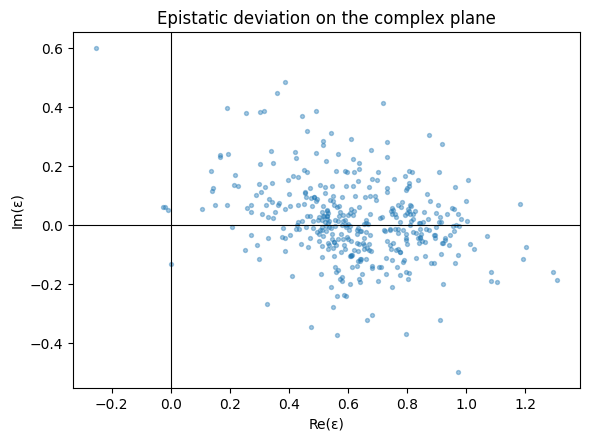

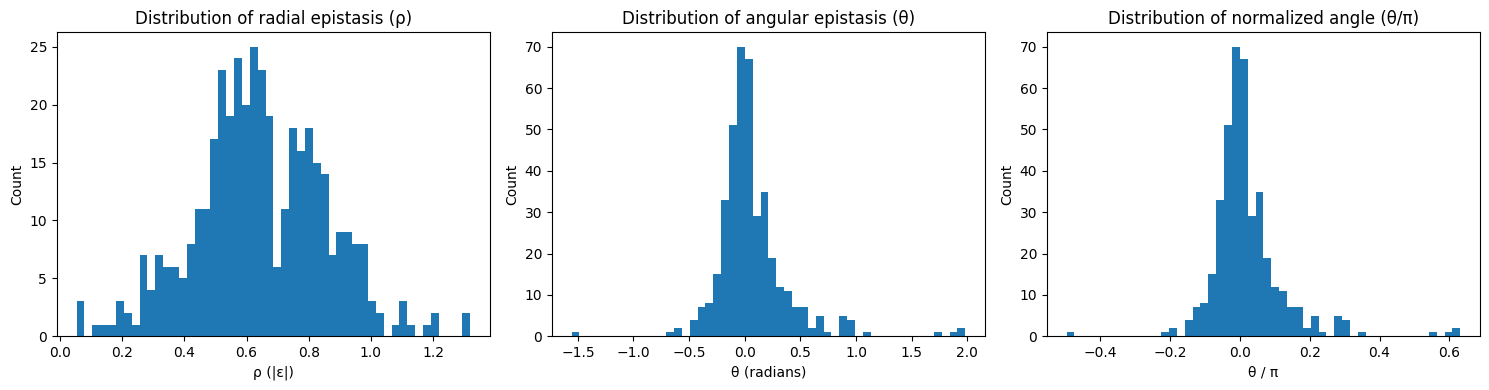

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 1. Complex plane scatter: rho + theta -> x + iy
# ------------------------------------------------------------------
rho = df_epi_tcga["rho"].values
theta = df_epi_tcga["theta"].values

x = rho * np.cos(theta)
y = rho * np.sin(theta)

fig, ax = plt.subplots(figsize=(6, 6))
sc = ax.scatter(x, y, s=8, alpha=0.4)

ax.axhline(0, color="black", linewidth=0.8)
ax.axvline(0, color="black", linewidth=0.8)
ax.set_xlabel("Re(ε)")
ax.set_ylabel("Im(ε)")
ax.set_title("Epistatic deviation on the complex plane")

ax.set_aspect("equal", adjustable="box")
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------
# 2. Marginal distributions for rho, theta, theta_over_pi
# ------------------------------------------------------------------
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# |ε| (radial epistasis)
axs[0].hist(df_epi_tcga["rho"], bins=50)
axs[0].set_xlabel("ρ (|ε|)")
axs[0].set_ylabel("Count")
axs[0].set_title("Distribution of radial epistasis (ρ)")

# θ (absolute angle, radians)
axs[1].hist(df_epi_tcga["theta"], bins=50)
axs[1].set_xlabel("θ (radians)")
axs[1].set_ylabel("Count")
axs[1].set_title("Distribution of angular epistasis (θ)")

# θ/π (normalized angle)
axs[2].hist(df_epi_tcga["theta_over_pi"], bins=50)
axs[2].set_xlabel("θ / π")
axs[2].set_ylabel("Count")
axs[2].set_title("Distribution of normalized angle (θ/π)")

plt.tight_layout()
plt.show()

In [44]:
df_epi_tcga.to_csv('/Users/nicolaslynn/Documents/phd/projects/genomenet/tcga_distributions_1bp.csv')

In [45]:

tcga_doubles_unlinked = ['ASB15:7:123617609:C:A:P|ASB15:7:123617610:C:A:P', 'CAV1:7:116526573:C:G:P|CAV1:7:116526574:C:T:P', 'CNDP2:18:74516325:G:T:P|CNDP2:18:74516326:G:T:P', 'CPED1:7:121271400:A:T:P|CPED1:7:121271401:C:A:P', 'DNAH11:7:21707817:G:C:P|DNAH11:7:21707818:A:T:P', 'EGFR:7:55154128:G:A:P|EGFR:7:55154129:C:T:P', 'EPB41L3:18:5416198:T:A:N|EPB41L3:18:5416199:C:A:N', 'FLG2:1:152353397:C:G:N|FLG2:1:152353398:C:T:N', 'IL1RL2:2:102218993:G:A:P|IL1RL2:2:102218994:G:A:P', 'FOXC2:16:86567698:C:A:P|FOXC2:16:86567699:C:A:P', 'GNAS:20:58909365:C:T:P|GNAS:20:58909366:G:A:P', 'HELZ:17:67072016:A:C:N|HELZ:17:67072017:A:C:N', 'KCND2:7:120275007:C:A:P|KCND2:7:120275008:C:A:P', 'ITPR1:3:4684370:T:G:P|ITPR1:3:4684371:T:C:P', 'KEAP1:19:10489660:G:A:N|KEAP1:19:10489661:G:C:N', 'KIT:4:54733175:T:G:P|KIT:4:54733176:A:G:P', 'MS4A6A:11:60173029:C:A:N|MS4A6A:11:60173030:C:A:N', 'KRAS:12:25245347:C:T:N|KRAS:12:25245348:C:A:N', 'LAPTM4B:8:97805332:T:G:P|LAPTM4B:8:97805333:T:G:P', 'LRP1B:2:140323920:T:C:N|LRP1B:2:140323921:C:T:N', 'LRP1B:2:141062088:T:A:N|LRP1B:2:141062089:G:T:N', 'MASP1:3:187235938:C:T:N|MASP1:3:187235939:C:T:N', 'MCF2L:13:113089609:G:C:P|MCF2L:13:113089610:T:C:P', 'MGAM:7:142062718:T:C:P|MGAM:7:142062719:C:G:P', 'NCOR2:12:124341824:T:A:N|NCOR2:12:124341825:C:A:N', 'MUC12:7:101000596:G:A:P|MUC12:7:101000597:A:C:P', 'MUC2:11:1098812:C:A:P|MUC2:11:1098813:C:A:P', 'NBPF1:1:16565815:T:G:N|NBPF1:1:16565816:A:G:N', 'NFAT5:16:69692091:T:A:P|NFAT5:16:69692092:C:G:P', 'NFAT5:16:69692091:T:A:P|NFAT5:16:69692092:C:A:P', 'NRAS:1:114713908:T:C:N|NRAS:1:114713909:G:T:N', 'NTM:11:132212124:C:T:P|NTM:11:132212125:T:C:P', 'UBE2W:8:73810473:C:A:N|UBE2W:8:73810474:C:A:N', 'OFD1:X:13746380:C:T:P|OFD1:X:13746381:G:A:P', 'OR2M3:1:248203353:G:T:P|OR2M3:1:248203354:G:T:P', 'PLCE1:10:94246100:C:A:P|PLCE1:10:94246101:A:G:P', 'RASAL2:1:178283653:A:T:P|RASAL2:1:178283654:C:T:P', 'RGS7BP:5:64594709:G:A:P|RGS7BP:5:64594710:G:A:P', 'SNTG2:2:1103392:T:C:P|SNTG2:2:1103393:T:C:P', 'SPEF2:5:35740206:C:T:P|SPEF2:5:35740207:C:T:P', 'SSTR2:17:73170179:C:T:P|SSTR2:17:73170180:C:T:P', 'SSTR2:17:73170180:C:T:P|SSTR2:17:73170181:C:T:P', 'SWI5:9:128276134:G:A:P|SWI5:9:128276135:G:A:P', 'TICRR:15:89585871:C:T:P|TICRR:15:89585872:C:T:P', 'TIGD7:16:3300599:T:C:N|TIGD7:16:3300600:C:A:N', 'TOMM40L:1:161229233:G:T:P|TOMM40L:1:161229234:C:T:P', 'TP53:17:7673802:C:T:N|TP53:17:7673803:G:A:N', 'TRAIP:3:49840256:T:G:N|TRAIP:3:49840257:T:C:N', 'ZNF713:7:55923271:G:C:P|ZNF713:7:55923272:G:C:P', 'USP33:1:77701483:A:G:N|USP33:1:77701484:A:G:N', 'EIF5AL1:10:79515870:G:T:P|EIF5AL1:10:79515871:T:C:P']


df_epi_tcga_unlinked = collect_epistasis_distribution(
    model,
    tcga_doubles_unlinked,
    context=3000,
)

df_epi_tcga_unlinked.to_csv('/Users/nicolaslynn/Documents/phd/projects/genomenet/tcga_distributions_unlinked.csv')



Epistasis sweep: 100%|██████████| 51/51 [01:19<00:00,  1.57s/it]
